In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('train_2.csv')
total_feat1=pd.read_csv('total_feat1.csv')
total_feat2=pd.read_csv('total_feat2.csv')
total_feat3=pd.read_csv('total_feat3.csv')
total_feat4=pd.read_csv('total_feat4.csv')
total_feat5=pd.read_csv('total_feat5.csv')
total_feat6=pd.read_csv('total_feat6.csv')
total_feat7=pd.read_csv('total_feat7.csv')
total_feat8=pd.read_csv('total_feat8.csv')
target1=pd.read_csv('target1.csv')
target2=pd.read_csv('target2.csv')
target3=pd.read_csv('target3.csv')
target4=pd.read_csv('target4.csv')
target5=pd.read_csv('target5.csv')
target6=pd.read_csv('target6.csv')
target7=pd.read_csv('target7.csv')
target8=pd.read_csv('target8.csv')
eda_train_imp=pd.read_csv('eda_train_imp.csv')

In [ ]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


## Model 1

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

(555, 7, 17)
Epoch 1/70
1/7 [===>..........................] - ETA: 0s - loss: 1.8469
Epoch 00001: val_loss improved from inf to 1.85204, saving model to model1_cnn.hdf5
7/7 [==============================] - 0s 41ms/step - loss: 1.5261 - val_loss: 1.8520
Epoch 2/70
1/7 [===>..........................] - ETA: 0s - loss: 1.0299
Epoch 00002: val_loss improved from 1.85204 to 1.30497, saving model to model1_cnn.hdf5
7/7 [==============================] - 0s 23ms/step - loss: 0.8580 - val_loss: 1.3050
Epoch 3/70
1/7 [===>..........................] - ETA: 0s - loss: 0.6724
Epoch 00003: val_loss improved from 1.30497 to 0.98268, saving model to model1_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.6580 - val_loss: 0.9827
Epoch 4/70
1/7 [===>..........................] - ETA: 0s - loss: 0.6131
Epoch 00004: val_loss improved from 0.98268 to 0.75553, saving model to model1_cnn.hdf5
7/7 [==============================] - 0s 22ms/step - loss: 0.5656 - val_loss: 0.7555
Epo

Epoch 37/70
1/7 [===>..........................] - ETA: 0s - loss: 0.3100
Epoch 00037: val_loss did not improve from 0.02724
7/7 [==============================] - 0s 16ms/step - loss: 0.3084 - val_loss: 0.0950
Epoch 38/70
1/7 [===>..........................] - ETA: 0s - loss: 0.3216
Epoch 00038: val_loss did not improve from 0.02724
7/7 [==============================] - 0s 16ms/step - loss: 0.3229 - val_loss: 0.1638
Epoch 39/70
1/7 [===>..........................] - ETA: 0s - loss: 0.2956
Epoch 00039: val_loss did not improve from 0.02724
7/7 [==============================] - 0s 17ms/step - loss: 0.3217 - val_loss: 0.1369
Epoch 40/70
1/7 [===>..........................] - ETA: 0s - loss: 0.3191
Epoch 00040: val_loss did not improve from 0.02724
7/7 [==============================] - 0s 16ms/step - loss: 0.3186 - val_loss: 0.1354
Epoch 41/70
1/7 [===>..........................] - ETA: 0s - loss: 0.3430
Epoch 00041: val_loss did not improve from 0.02724
7/7 [==========================

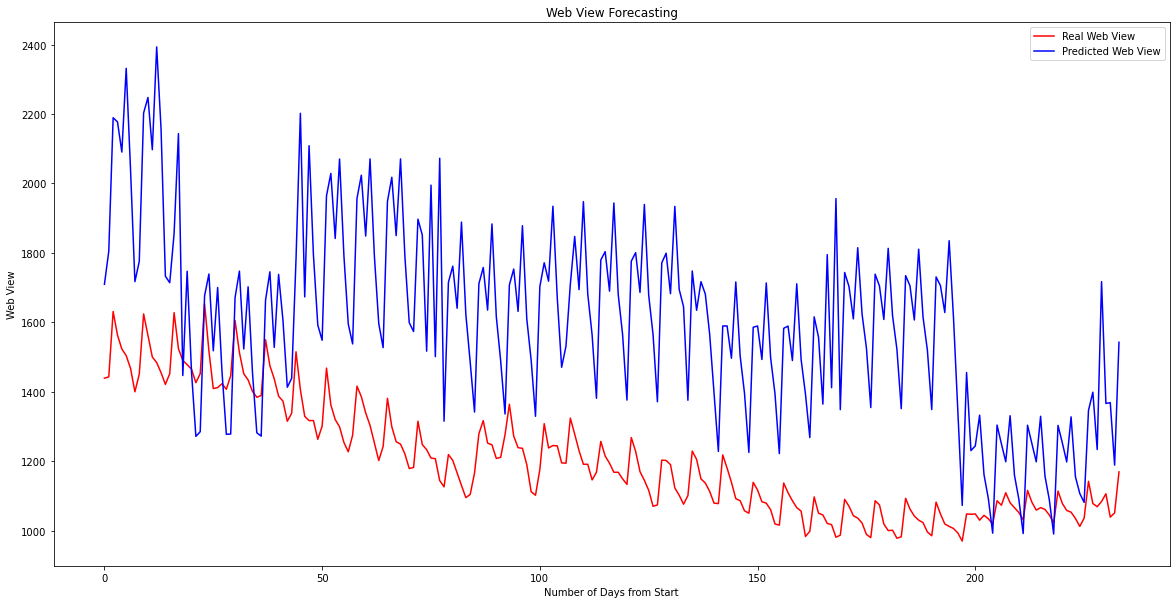

Score for the model  28.654751750115942


In [ ]:
from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat1, target1, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)

print(train_x.shape)
from keras import Sequential
import keras
from keras.layers import Conv1D,BatchNormalization,MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
model1=Sequential()
model1.add(Conv1D(128,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model1.add(Conv1D(32,(3),padding='same',activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv1D(8,(3),padding='same',activation='relu'))

model1.add(MaxPooling1D((2)))
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.8))
model1.add(Dense(1))

         
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model1.compile(loss=customLoss,optimizer=opt)

filepath='model1_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model1.fit(train_x,train_y,epochs=70,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model1.load_weights('model1_cnn.hdf5')
model1.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model1.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))


## Model 2

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 1.7574
Epoch 00001: val_loss improved from inf to 1.84834, saving model to model2_cnn.hdf5
7/7 [==============================] - 0s 45ms/step - loss: 1.3266 - val_loss: 1.8483
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8762
Epoch 00002: val_loss improved from 1.84834 to 1.70257, saving model to model2_cnn.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 0.9347 - val_loss: 1.7026
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.9404
Epoch 00003: val_loss improved from 1.70257 to 1.51833, saving model to model2_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.9371 - val_loss: 1.5183
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 1.0259
Epoch 00004: val_loss improved from 1.51833 to 1.34506, saving model to model2_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.8591 - val_loss: 1.3451
Epoch 5/100


7/7 [==============================] - 0s 27ms/step - loss: 0.5147 - val_loss: 0.1721
Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5276
Epoch 00036: val_loss did not improve from 0.17214
7/7 [==============================] - 0s 20ms/step - loss: 0.5029 - val_loss: 0.2023
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.5083
Epoch 00037: val_loss did not improve from 0.17214
7/7 [==============================] - 0s 19ms/step - loss: 0.5083 - val_loss: 0.2550
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3729
Epoch 00038: val_loss did not improve from 0.17214
7/7 [==============================] - 0s 17ms/step - loss: 0.5397 - val_loss: 0.2633
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5228
Epoch 00039: val_loss did not improve from 0.17214
7/7 [==============================] - 0s 21ms/step - loss: 0.5235 - val_loss: 0.2208
Epoch 40/100
7/7 [==============================] - ETA: 0s - loss

Epoch 73/100
7/7 [==============================] - ETA: 0s - loss: 0.4780
Epoch 00073: val_loss did not improve from 0.01632
7/7 [==============================] - 0s 24ms/step - loss: 0.4780 - val_loss: 0.0185
Epoch 74/100
6/7 [========================>.....] - ETA: 0s - loss: 0.5205
Epoch 00074: val_loss did not improve from 0.01632
7/7 [==============================] - 0s 25ms/step - loss: 0.5211 - val_loss: 0.0646
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5397
Epoch 00075: val_loss did not improve from 0.01632
7/7 [==============================] - 0s 20ms/step - loss: 0.5191 - val_loss: 0.0509
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3728
Epoch 00076: val_loss did not improve from 0.01632
7/7 [==============================] - 0s 17ms/step - loss: 0.4958 - val_loss: 0.0179
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4555
Epoch 00077: val_loss did not improve from 0.01632
7/7 [=====================

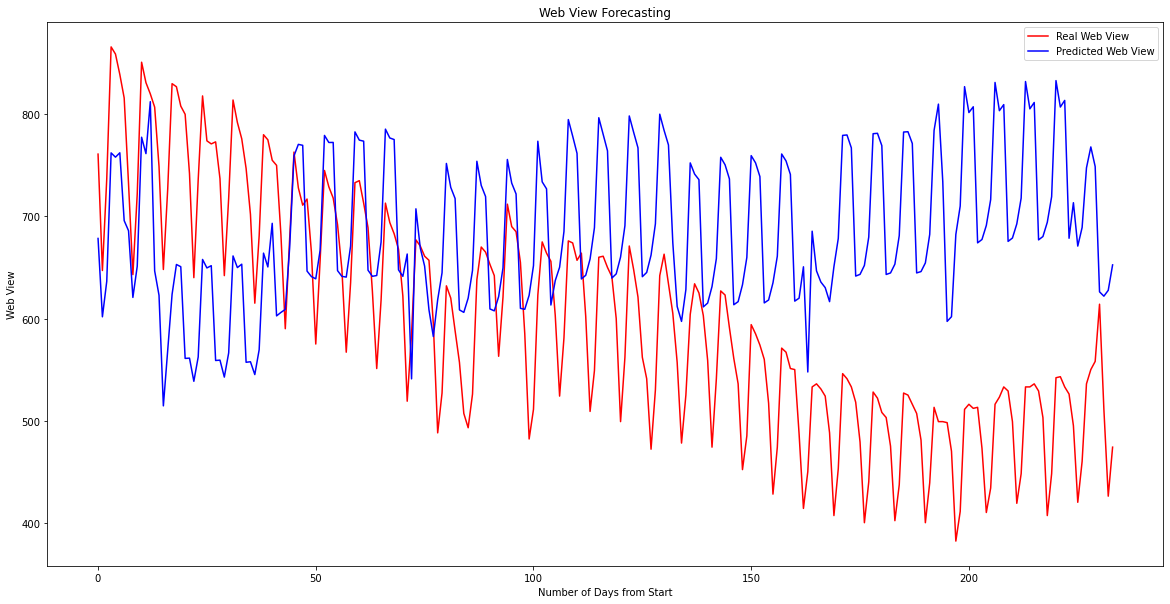

Score for the model  21.54678430133563


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat2, target2, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import Conv1D,MaxPool1D,BatchNormalization,Flatten
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model2=Sequential()
model2.add(Conv1D(256,(2),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model2.add(Conv1D(32,(2),padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv1D(8,(2),padding='same',activation='relu'))

model2.add(MaxPooling1D((2)))
model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.8))
model2.add(Dense(1))

         
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model2.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model2_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model2.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model2.load_weights('model2_cnn.hdf5')
model2.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model2.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 3

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1296
Epoch 00001: val_loss improved from inf to 1.76502, saving model to model3_cnn.hdf5
7/7 [==============================] - 0s 40ms/step - loss: 1.0904 - val_loss: 1.7650
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.9701
Epoch 00002: val_loss improved from 1.76502 to 1.70925, saving model to model3_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.9272 - val_loss: 1.7093
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8064
Epoch 00003: val_loss improved from 1.70925 to 1.65097, saving model to model3_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.7597 - val_loss: 1.6510
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8671
Epoch 00004: val_loss improved from 1.65097 to 1.58217, saving model to model3_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.7427 - val_loss: 1.5822
Epoch 5/100


Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5401
Epoch 00036: val_loss did not improve from 0.05534
7/7 [==============================] - 0s 13ms/step - loss: 0.4709 - val_loss: 0.1040
Epoch 37/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5000
Epoch 00037: val_loss did not improve from 0.05534
7/7 [==============================] - 0s 13ms/step - loss: 0.4511 - val_loss: 0.1115
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5328
Epoch 00038: val_loss did not improve from 0.05534
7/7 [==============================] - 0s 14ms/step - loss: 0.4816 - val_loss: 0.1013
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3967
Epoch 00039: val_loss did not improve from 0.05534
7/7 [==============================] - 0s 17ms/step - loss: 0.4659 - val_loss: 0.1020
Epoch 40/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5205
Epoch 00040: val_loss did not improve from 0.05534
7/7 [=====================

1/7 [===>..........................] - ETA: 0s - loss: 0.5755
Epoch 00074: val_loss did not improve from 0.04621
7/7 [==============================] - 0s 13ms/step - loss: 0.4612 - val_loss: 0.0610
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4648
Epoch 00075: val_loss did not improve from 0.04621
7/7 [==============================] - 0s 14ms/step - loss: 0.4393 - val_loss: 0.0807
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4558
Epoch 00076: val_loss did not improve from 0.04621
7/7 [==============================] - 0s 12ms/step - loss: 0.4598 - val_loss: 0.0863
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4062
Epoch 00077: val_loss did not improve from 0.04621
7/7 [==============================] - 0s 13ms/step - loss: 0.4527 - val_loss: 0.0662
Epoch 78/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4185
Epoch 00078: val_loss did not improve from 0.04621
7/7 [==============================] - 

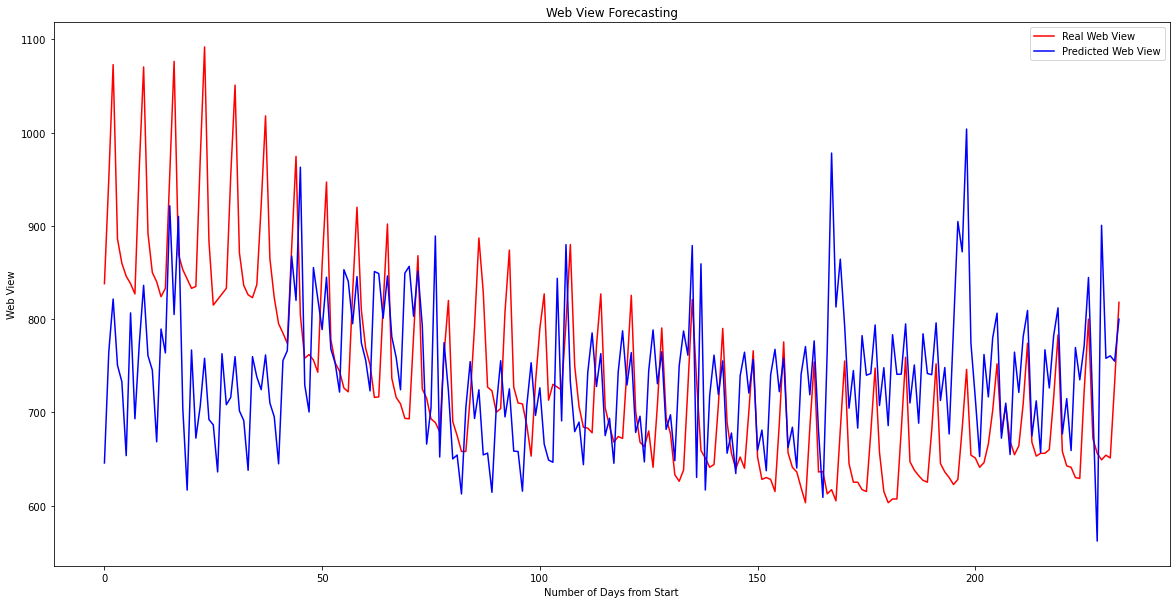

Score for the model  11.689613974009365


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat3, target3, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import Conv1D,BatchNormalization,Flatten,MaxPooling1D
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model3=Sequential()
model3.add(Conv1D(8,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model3.add(Conv1D(8,(3),padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv1D(4,(3),padding='same',activation='relu'))

model3.add(MaxPooling1D((2)))
model3.add(Flatten())
model3.add(Dense(16,activation='relu'))
model3.add(Dropout(0.8))
model3.add(Dense(1))


#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model3.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model3_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model3.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model3.load_weights('model3_cnn.hdf5')
model3.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model3.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 4

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.8071
Epoch 00001: val_loss improved from inf to 1.92694, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 51ms/step - loss: 0.8071 - val_loss: 1.9269
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3542
Epoch 00002: val_loss improved from 1.92694 to 1.88493, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 29ms/step - loss: 0.3542 - val_loss: 1.8849
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.2440
Epoch 00003: val_loss improved from 1.88493 to 1.87870, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.2440 - val_loss: 1.8787
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2475
Epoch 00004: val_loss improved from 1.87870 to 1.85467, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.2475 - val_loss: 1.8547
Epoch 5/100


1/7 [===>..........................] - ETA: 0s - loss: 0.2670
Epoch 00035: val_loss improved from 0.55105 to 0.53372, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.1798 - val_loss: 0.5337
Epoch 36/100
7/7 [==============================] - ETA: 0s - loss: 0.1644
Epoch 00036: val_loss improved from 0.53372 to 0.37889, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.1644 - val_loss: 0.3789
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.1806
Epoch 00037: val_loss improved from 0.37889 to 0.36167, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 29ms/step - loss: 0.1806 - val_loss: 0.3617
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.1686
Epoch 00038: val_loss improved from 0.36167 to 0.32444, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.1686 - val_loss: 0.3244
Epoch 39/100
7/7 

7/7 [==============================] - ETA: 0s - loss: 0.1588
Epoch 00072: val_loss improved from 0.07820 to 0.02886, saving model to model4_cnn.hdf5
7/7 [==============================] - 0s 23ms/step - loss: 0.1588 - val_loss: 0.0289
Epoch 73/100
7/7 [==============================] - ETA: 0s - loss: 0.1734
Epoch 00073: val_loss did not improve from 0.02886
7/7 [==============================] - 0s 16ms/step - loss: 0.1734 - val_loss: 0.0837
Epoch 74/100
7/7 [==============================] - ETA: 0s - loss: 0.1646
Epoch 00074: val_loss did not improve from 0.02886
7/7 [==============================] - 0s 21ms/step - loss: 0.1646 - val_loss: 0.0778
Epoch 75/100
7/7 [==============================] - ETA: 0s - loss: 0.1590
Epoch 00075: val_loss did not improve from 0.02886
7/7 [==============================] - 0s 18ms/step - loss: 0.1590 - val_loss: 0.0565
Epoch 76/100
7/7 [==============================] - ETA: 0s - loss: 0.1580
Epoch 00076: val_loss did not improve from 0.02886
7/

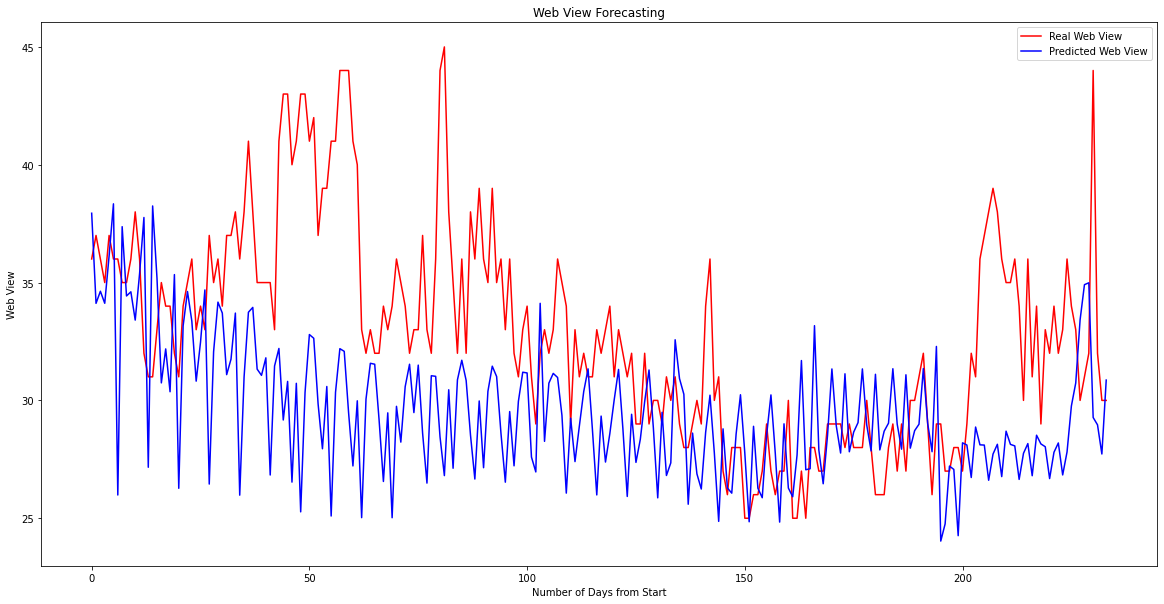

Score for the model  13.549275456496055


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat4, target4, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model4=Sequential()
model4.add(Conv1D(128,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model4.add(Conv1D(64,(3),padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv1D(16,(3),padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv1D(4,(3),padding='same',activation='relu'))

model4.add(MaxPooling1D((2)))
model4.add(Flatten())
model4.add(Dense(16,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1))




#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model4.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model4_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model4.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model4.load_weights('model4_cnn.hdf5')
model4.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model4.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 5

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.8397
Epoch 00001: val_loss improved from inf to 1.39817, saving model to model5_cnn.hdf5
7/7 [==============================] - 0s 59ms/step - loss: 0.8397 - val_loss: 1.3982
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 0.4274
Epoch 00002: val_loss improved from 1.39817 to 1.30244, saving model to model5_cnn.hdf5
7/7 [==============================] - 1s 200ms/step - loss: 0.4178 - val_loss: 1.3024
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.3160
Epoch 00003: val_loss did not improve from 1.30244
7/7 [==============================] - 0s 16ms/step - loss: 0.3160 - val_loss: 1.3844
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3838
Epoch 00004: val_loss did not improve from 1.30244
7/7 [==============================] - 0s 13ms/step - loss: 0.3139 - val_loss: 1.4056
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4173
Epoch 00005

Epoch 36/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1965
Epoch 00036: val_loss improved from 0.35391 to 0.27160, saving model to model5_cnn.hdf5
7/7 [==============================] - 0s 42ms/step - loss: 0.1949 - val_loss: 0.2716
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.2009
Epoch 00037: val_loss did not improve from 0.27160
7/7 [==============================] - 0s 22ms/step - loss: 0.2009 - val_loss: 0.3158
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2368
Epoch 00038: val_loss did not improve from 0.27160
7/7 [==============================] - 0s 14ms/step - loss: 0.1909 - val_loss: 0.4813
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2099
Epoch 00039: val_loss did not improve from 0.27160
7/7 [==============================] - 0s 16ms/step - loss: 0.1942 - val_loss: 0.4830
Epoch 40/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2179
Epoch 00040: val_loss did not improve fr

Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2386
Epoch 00074: val_loss improved from 0.11793 to 0.09328, saving model to model5_cnn.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 0.1972 - val_loss: 0.0933
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2347
Epoch 00075: val_loss improved from 0.09328 to 0.09179, saving model to model5_cnn.hdf5
7/7 [==============================] - 0s 22ms/step - loss: 0.1957 - val_loss: 0.0918
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2217
Epoch 00076: val_loss did not improve from 0.09179
7/7 [==============================] - 0s 14ms/step - loss: 0.1765 - val_loss: 0.0955
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2326
Epoch 00077: val_loss did not improve from 0.09179
7/7 [==============================] - 0s 14ms/step - loss: 0.1830 - val_loss: 0.1234
Epoch 78/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2340
Epo

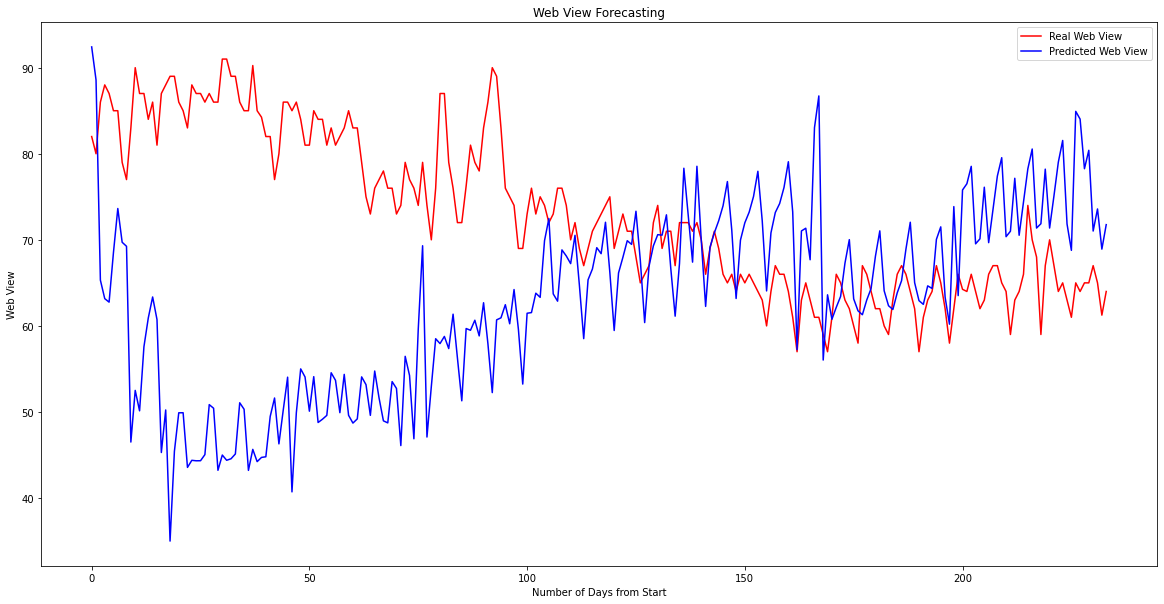

Score for the model  23.664159093597053


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat5, target5, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model5=Sequential()
model5.add(Conv1D(128,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model5.add(Conv1D(32,(3),padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(Conv1D(12,(3),padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(Conv1D(4,(3),padding='same',activation='relu'))

model5.add(MaxPooling1D((2)))
model5.add(Flatten())
model5.add(Dense(16,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1))


def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model5.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model5_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model5.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model5.load_weights('model5_cnn.hdf5')
model5.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model5.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 6

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 1.7655
Epoch 00001: val_loss improved from inf to 1.80678, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 62ms/step - loss: 1.1503 - val_loss: 1.8068
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.5574
Epoch 00002: val_loss improved from 1.80678 to 1.62037, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 29ms/step - loss: 0.5574 - val_loss: 1.6204
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.5304
Epoch 00003: val_loss improved from 1.62037 to 1.51363, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 31ms/step - loss: 0.5304 - val_loss: 1.5136
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.4785
Epoch 00004: val_loss improved from 1.51363 to 1.46596, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 32ms/step - loss: 0.4785 - val_loss: 1.4660
Epoch 5/100


Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 0.4790
Epoch 00035: val_loss improved from 0.69464 to 0.66934, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 33ms/step - loss: 0.4790 - val_loss: 0.6693
Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5508
Epoch 00036: val_loss improved from 0.66934 to 0.65576, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 22ms/step - loss: 0.4220 - val_loss: 0.6558
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.4116
Epoch 00037: val_loss improved from 0.65576 to 0.63688, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 28ms/step - loss: 0.4116 - val_loss: 0.6369
Epoch 38/100
6/7 [========================>.....] - ETA: 0s - loss: 0.4389
Epoch 00038: val_loss improved from 0.63688 to 0.60070, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.4368 - val_loss: 0.6007
Epoc

Epoch 71/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3111
Epoch 00071: val_loss improved from 0.14705 to 0.12274, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.3314 - val_loss: 0.1227
Epoch 72/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3542
Epoch 00072: val_loss improved from 0.12274 to 0.10660, saving model to model6_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.2861 - val_loss: 0.1066
Epoch 73/100
7/7 [==============================] - ETA: 0s - loss: 0.2959
Epoch 00073: val_loss did not improve from 0.10660
7/7 [==============================] - 0s 20ms/step - loss: 0.2959 - val_loss: 0.2019
Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3519
Epoch 00074: val_loss did not improve from 0.10660
7/7 [==============================] - 0s 16ms/step - loss: 0.3220 - val_loss: 0.2032
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2182
Epo

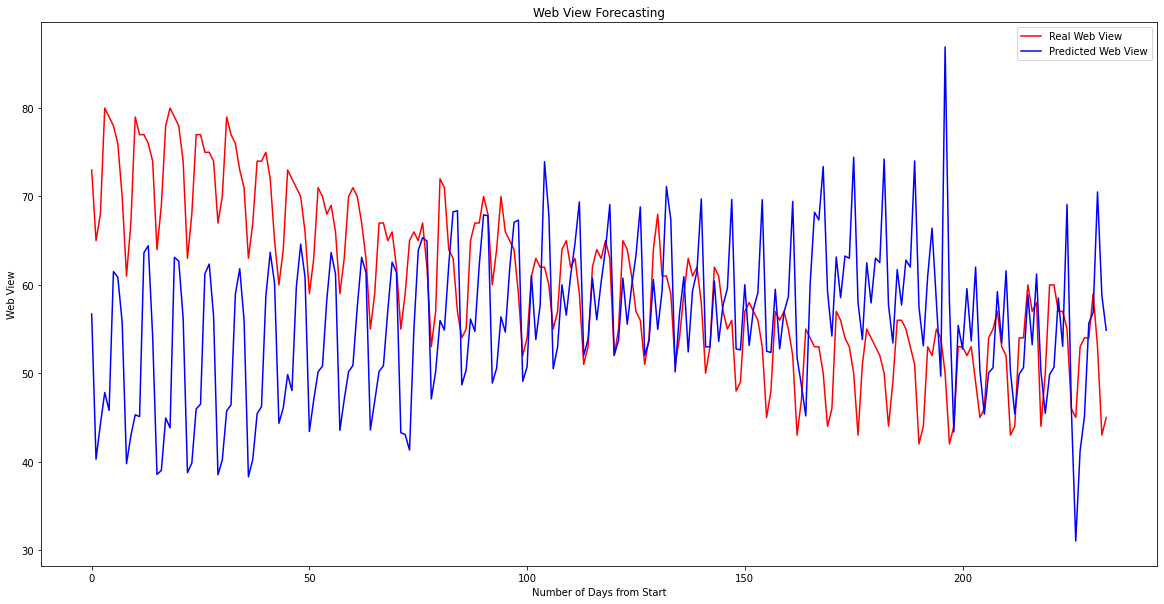

Score for the model  18.07448370800463


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat6, target6, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model6=Sequential()
model6.add(Conv1D(128,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model6.add(Conv1D(32,(3),padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv1D(12,(3),padding='same',activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv1D(4,(3),padding='same',activation='relu'))

model6.add(MaxPooling1D((2)))
model6.add(Flatten())
model6.add(Dense(16,activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(1))
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model6.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model6_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model6.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model6.load_weights('model6_cnn.hdf5')
model6.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model6.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 7

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1008
Epoch 00001: val_loss improved from inf to 1.56663, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 56ms/step - loss: 0.4863 - val_loss: 1.5666
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3620
Epoch 00002: val_loss improved from 1.56663 to 1.42276, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.2801 - val_loss: 1.4228
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2452
Epoch 00003: val_loss improved from 1.42276 to 1.35329, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 23ms/step - loss: 0.2258 - val_loss: 1.3533
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3075
Epoch 00004: val_loss did not improve from 1.35329
7/7 [==============================] - 0s 16ms/step - loss: 0.2290 - val_loss: 1.3551
Epoch 5/100
1/7 [===>..........................] 

1/7 [===>..........................] - ETA: 0s - loss: 0.2313
Epoch 00036: val_loss improved from 0.37379 to 0.31815, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 22ms/step - loss: 0.1652 - val_loss: 0.3182
Epoch 37/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2515
Epoch 00037: val_loss did not improve from 0.31815
7/7 [==============================] - 0s 17ms/step - loss: 0.1666 - val_loss: 0.3419
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2494
Epoch 00038: val_loss did not improve from 0.31815
7/7 [==============================] - 0s 20ms/step - loss: 0.1869 - val_loss: 0.4325
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2216
Epoch 00039: val_loss improved from 0.31815 to 0.31030, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.1690 - val_loss: 0.3103
Epoch 40/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2274
Epoch 00040: val

1/7 [===>..........................] - ETA: 0s - loss: 0.2184
Epoch 00073: val_loss did not improve from 0.04356
7/7 [==============================] - 0s 15ms/step - loss: 0.1610 - val_loss: 0.1861
Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2117
Epoch 00074: val_loss did not improve from 0.04356
7/7 [==============================] - 0s 15ms/step - loss: 0.1655 - val_loss: 0.1645
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.1976
Epoch 00075: val_loss improved from 0.04356 to 0.03637, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.1650 - val_loss: 0.0364
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2410
Epoch 00076: val_loss improved from 0.03637 to 0.03453, saving model to model7_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.1584 - val_loss: 0.0345
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2754
Epoch 00077: val

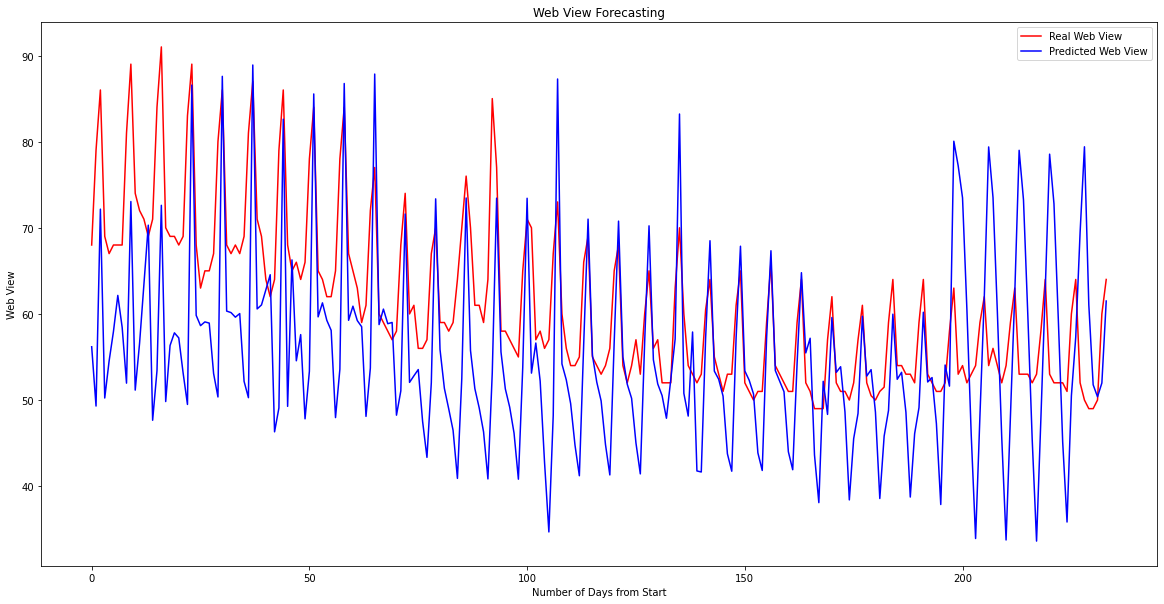

Score for the model  15.800219000693097


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat7, target7, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model7=Sequential()
model7.add(Conv1D(128,(3),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model7.add(Conv1D(12,(3),padding='same',activation='relu'))
model7.add(BatchNormalization())
model7.add(Conv1D(12,(3),padding='same',activation='relu'))
model7.add(BatchNormalization())
model7.add(Conv1D(8,(3),padding='same',activation='relu'))

model7.add(MaxPooling1D((2)))
model7.add(Flatten())
model7.add(Dense(12,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(1))

#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model7.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model7_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model7.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model7.load_weights('model7_cnn.hdf5')
model7.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model7.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Model 8

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 1.3730
Epoch 00001: val_loss improved from inf to 1.76188, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 60ms/step - loss: 1.0396 - val_loss: 1.7619
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6158
Epoch 00002: val_loss improved from 1.76188 to 1.65442, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 25ms/step - loss: 0.5128 - val_loss: 1.6544
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5630
Epoch 00003: val_loss improved from 1.65442 to 1.57797, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 23ms/step - loss: 0.4431 - val_loss: 1.5780
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5183
Epoch 00004: val_loss improved from 1.57797 to 1.46664, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.3754 - val_loss: 1.4666
Epoch 5/100


Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 0.2079
Epoch 00035: val_loss improved from 0.24233 to 0.20888, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 27ms/step - loss: 0.2079 - val_loss: 0.2089
Epoch 36/100
7/7 [==============================] - ETA: 0s - loss: 0.2146
Epoch 00036: val_loss improved from 0.20888 to 0.17710, saving model to model8_cnn.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.2146 - val_loss: 0.1771
Epoch 37/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4414
Epoch 00037: val_loss did not improve from 0.17710
7/7 [==============================] - 0s 16ms/step - loss: 0.2328 - val_loss: 0.1845
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.2062
Epoch 00038: val_loss did not improve from 0.17710
7/7 [==============================] - 0s 17ms/step - loss: 0.2062 - val_loss: 0.1893
Epoch 39/100
7/7 [==============================] - ETA: 0s - loss: 0.2129
Epo

Epoch 73/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3794
Epoch 00073: val_loss did not improve from 0.09604
7/7 [==============================] - 0s 15ms/step - loss: 0.1876 - val_loss: 0.1751
Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4083
Epoch 00074: val_loss did not improve from 0.09604
7/7 [==============================] - 0s 14ms/step - loss: 0.1904 - val_loss: 0.1651
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3592
Epoch 00075: val_loss did not improve from 0.09604
7/7 [==============================] - 0s 15ms/step - loss: 0.1918 - val_loss: 0.1743
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4045
Epoch 00076: val_loss did not improve from 0.09604
7/7 [==============================] - 0s 15ms/step - loss: 0.1918 - val_loss: 0.1617
Epoch 77/100
7/7 [==============================] - ETA: 0s - loss: 0.1785
Epoch 00077: val_loss did not improve from 0.09604
7/7 [=====================

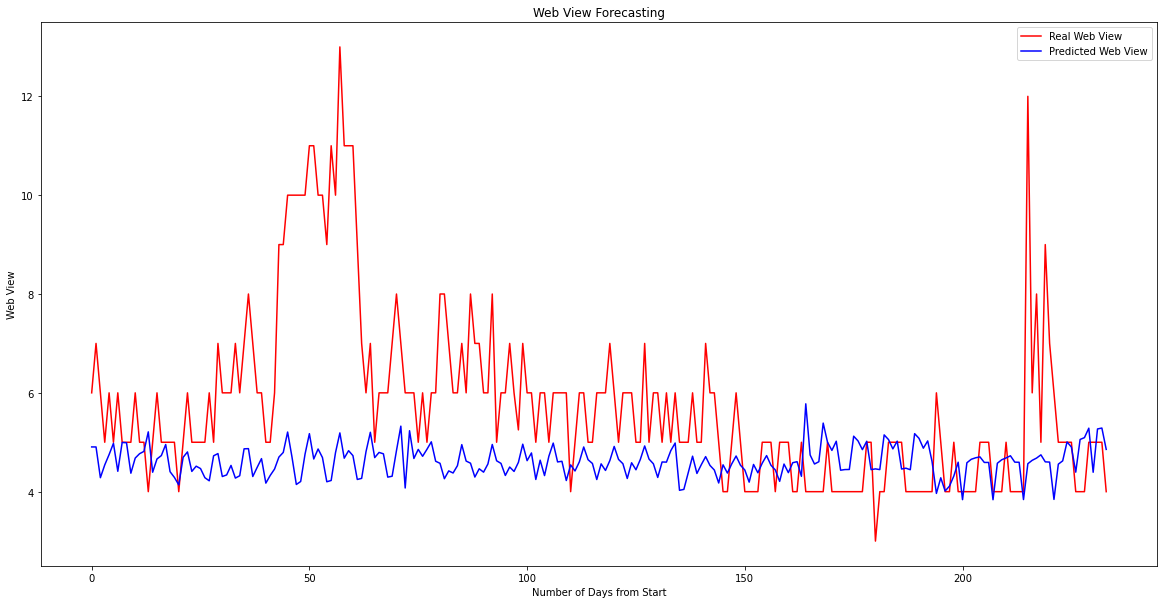

Score for the model  24.931914115782575


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(total_feat8, target8, test_size = 0.3, random_state = 0,shuffle=False)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X_train['month_start']=le1.fit_transform(X_train['month_start'])
X_test['month_start']=le1.transform(X_test['month_start'])

le2=LabelEncoder()
X_train['month_end']=le2.fit_transform(X_train['month_end'])
X_test['month_end']=le2.transform(X_test['month_end'])

le3=LabelEncoder()
X_train['quarter_start']=le3.fit_transform(X_train['quarter_start'])
X_test['quarter_start']=le3.transform(X_test['quarter_start'])

le4=LabelEncoder()
X_train['quarter_end']=le4.fit_transform(X_train['quarter_end'])
X_test['quarter_end']=le4.transform(X_test['quarter_end'])


def create_dataset(X,y,timestep=1):
    Xs,ys=[],[]
    for i in range(len(X)-timestep):
        v=X[i:i+timestep]
        Xs.append(v)
        ys.append(y[i+timestep])
    return np.array(Xs),np.array(ys)

from sklearn.preprocessing import RobustScaler

#for i in X_train.columns:
    
 #   X_train[i] = X_train[i].astype('float')
  #  X_test[i]=X_test[i].astype('float')
X_train=np.log1p(X_train)
X_test=np.log1p(X_test)
y_train=np.log1p(y_train)

    
train_x,train_y=create_dataset(X_train.values,y_train.values,7)
test_x,test_y=create_dataset(X_test.values,y_test.values,7)


from keras import Sequential
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.optimizers import Adam
model8=Sequential()
model8.add(Conv1D(128,(2),padding='same',activation='relu',input_shape=(train_x.shape[1],train_x.shape[2],)))
model8.add(Conv1D(64,(2),padding='same',activation='relu'))
model8.add(BatchNormalization())
model8.add(Conv1D(8,(2),padding='same',activation='relu'))
model8.add(BatchNormalization())
model8.add(Conv1D(4,(2),padding='same',activation='relu'))

model8.add(MaxPooling1D((2)))
model8.add(Flatten())
model8.add(Dense(16,activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(1))
#model.add(Dropout(0.8))
def customLoss(y_true, y_pred):
    epsilon = 0.1
    summ = K.maximum(K.abs(y_true) + K.abs(y_pred) + epsilon, 0.5 + epsilon)
    smape = K.abs(y_pred - y_true) / summ * 2.0
    return smape

opt=Adam(learning_rate=0.001)
model8.compile(loss=customLoss,optimizer=opt)
#print(model.summary())
filepath='model8_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model8.fit(train_x,train_y,epochs=100,batch_size=64,verbose=1,validation_split=0.2,shuffle=False,callbacks=callbacks_list)


model8.load_weights('model8_cnn.hdf5')
model8.compile(loss=customLoss,optimizer=opt)

y_pred_lstm=model8.predict(test_x)
y_pred_lstm=np.exp(y_pred_lstm)-1
test_y_lstm=test_y

plt.figure(figsize=(20,10))
plt.plot(test_y_lstm,  color = 'red', label = 'Real Web View')
plt.plot(y_pred_lstm, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

print("Score for the model " ,smape(test_y_lstm,y_pred_lstm))

## Kaggle Predictions 

In [ ]:
from datetime import date , timedelta
sdate = date(2017,9,13)   # start date
edate = date(2017,11,23)   # end date
actual_edate=date(2017,11,13)
delta = actual_edate-sdate
days= delta.days+1
test_date=pd.date_range(sdate,edate-timedelta(days=1),freq='d')
print(days)

62


In [ ]:
def global_feat(datelist):
   
    weekday_test=[]
    for i in datelist:
        weekday_test.append(i.weekday())
    weekday_test=pd.Series(weekday_test)

    month_test=[]
    for i in datelist:
        month_test.append(i.month)
    month_test=pd.Series(month_test)

    month_start_test=[]
    month_start_test=pd.Series(datelist).dt.is_month_start

    month_end_test=[]
    month_end_test=pd.Series(datelist).dt.is_month_end

    quarter_start_test=[]
    quarter_start_test=pd.Series(datelist).dt.is_quarter_start

    quarter_end_test=[]
    quarter_end_test=pd.Series(datelist).dt.is_quarter_end

    week_test=[]
    week_test=pd.Series(datelist).dt.week


    quarter_test=[]
    quarter_test=pd.Series(datelist).dt.quarter


    days_in_month_test=[]
    days_in_month_test =pd.Series(datelist).dt.days_in_month

    year_test=[]
    year_test=pd.Series(datelist).dt.year


    is_sunday_or_monday_test=[]
    for i in weekday_test:
        if i == 0 or i == 6:
            is_sunday_or_monday_test.append(1)
        else:
            is_sunday_or_monday_test.append(0)
    is_sunday_or_monday_test=pd.Series(is_sunday_or_monday_test)


    is_august_test=[]
    for i in month_test:
        if i == 8:
            is_august_test.append(1)
        else:
            is_august_test.append(0)
    is_august_test=pd.Series(is_august_test)

    year_half_test=[]
    for i in month_test:
        if i in [1,2,3,4,5,6] :
            year_half_test.append(1)
        else :
            year_half_test.append(2)
    year_half_test=pd.Series(year_half_test)

### The above features are irrespective of the page , I will call them global features
    global_feat=pd.DataFrame()
    global_feat=pd.concat([weekday_test,is_sunday_or_monday_test,month_test,is_august_test,year_half_test,quarter_test,quarter_start_test,quarter_end_test,month_start_test,month_end_test,days_in_month_test,week_test],axis=1)
    global_feat.columns=['weekday','is_sunday_or_monday','month','is_august','year_half','quarter','quarter_start','quarter_end','month_start','month_end','days_in_month','week']
    return global_feat

In [ ]:
global_feat_test=global_feat(test_date)
global_feat_test

,weekday,is_sunday_or_monday,month,is_august,year_half,quarter,quarter_start,quarter_end,month_start,month_end,days_in_month,week
0,2,0,9,0,2,3,False,False,False,False,30,37
1,3,0,9,0,2,3,False,False,False,False,30,37
2,4,0,9,0,2,3,False,False,False,False,30,37
3,5,0,9,0,2,3,False,False,False,False,30,37
4,6,1,9,0,2,3,False,False,False,False,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
66,5,0,11,0,2,4,False,False,False,False,30,46
67,6,1,11,0,2,4,False,False,False,False,30,46
68,0,1,11,0,2,4,False,False,False,False,30,47
69,1,0,11,0,2,4,False,False,False,False,30,47


In [ ]:
viewmid=pd.read_csv('viewmid.csv')
view1=viewmid.loc[0].values[0]
view2=viewmid.loc[1].values[0]
view3=viewmid.loc[2].values[0]
view4=viewmid.loc[3].values[0]

In [ ]:
def total_feat_create(page,global_feat,eda_train_imp):
    access_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Access'].values[0]
    agent_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Agent'].values[0]
    viewperc=eda_train_imp.loc[eda_train_imp['Page']==page]['viewperc'].values[0]

    
    if agent_index == 1:
        spider=[1]*(global_feat.shape[0])
        non_spider=[0]*(global_feat.shape[0])
    else:
        spider=[0]*(global_feat.shape[0])
        non_spider=[1]*(global_feat.shape[0])
    spider=pd.Series(spider)
    non_spider=pd.Series(non_spider)
    page_specific_feat=pd.DataFrame()
    page_specific_feat=pd.concat([spider,non_spider],axis=1)
    page_specific_feat.columns=['spider','non_spider']
    if access_index==0:
        page_specific_feat['All_Access']=1
        page_specific_feat['Desktop']=0
        page_specific_feat['Mobile']=0

    elif access_index==1:
        page_specific_feat['All_Access']=0
        page_specific_feat['Desktop']=1
        page_specific_feat['Mobile']=0
    else:
        page_specific_feat['All_Access']=0
        page_specific_feat['Desktop']=0
        page_specific_feat['Mobile']=1

    total_feat=pd.concat([global_feat,page_specific_feat],axis=1)
    return total_feat

In [ ]:
def testing(page,global_feat,days):
    total_feat=pd.DataFrame()
    total_feat=total_feat_create(page,global_feat,eda_train_imp)
    access_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Access'].values[0]
    agent_index=eda_train_imp.loc[eda_train_imp['Page']==page]['Agent'].values[0]
    viewperc=eda_train_imp.loc[eda_train_imp['Page']==page]['viewperc'].values[0]

    
    from sklearn.preprocessing import LabelEncoder
    le1=LabelEncoder()
    total_feat['month_start']=le1.fit_transform(total_feat['month_start'])


    le2=LabelEncoder()
    total_feat['month_end']=le2.fit_transform(total_feat['month_end'])


    le3=LabelEncoder()
    total_feat['quarter_start']=le3.fit_transform(total_feat['quarter_start'])


    le4=LabelEncoder()
    total_feat['quarter_end']=le4.fit_transform(total_feat['quarter_end'])



    def create_test_dataset(X,timestep=1):
        Xs=[]
        for i in range(len(X)):
            end_ix=i+timestep
            if end_ix > X.shape[0]:
                break
            
            v=X[i:end_ix]
            Xs.append(v)
            
        return np.array(Xs)

    from sklearn.preprocessing import RobustScaler
    '''
    for i in total_feat.columns:
    
        total_feat[i] = total_feat[i].astype('float')
    '''
    total_feat=np.log1p(total_feat)
    test_x=create_test_dataset(total_feat.values,7)
    
    if access_index==0 and agent_index==0:
        if viewperc>=view1:
            y_pred_lstm=model1.predict(test_x)
        else:
            y_pred_lstm=model5.predict(test_x)

    elif access_index==1 and agent_index==0:
        if viewperc>=view2:
            y_pred_lstm=model2.predict(test_x)
        else:
            y_pred_lstm=model6.predict(test_x)

    elif access_index==2 and agent_index==0:
        if viewperc>=view3:
            y_pred_lstm=model3.predict(test_x)
        else:
            y_pred_lstm=model7.predict(test_x)
    elif access_index==0 and agent_index==1:
        if viewperc>=view4:
            y_pred_lstm=model4.predict(test_x)
        else:
            y_pred_lstm=model8.predict(test_x)

    y_pred_lstm=y_pred_lstm[0:days]
    y_pred_lstm=np.exp(y_pred_lstm)-1
    y_pred_lstm=pd.DataFrame(y_pred_lstm)
    print(y_pred_lstm.shape)
    y_pred_lstm['Page']=page
    return y_pred_lstm

In [ ]:
key_data_new=pd.read_csv('key_data_pro.csv')
key_data_new.head()

,Page_name,Id
0,007_スペクター_ja.wikipedia.org_all-access_all-agents,0b293039387a
1,007_スペクター_ja.wikipedia.org_all-access_all-agents,7114389dd824
2,007_スペクター_ja.wikipedia.org_all-access_all-agents,057b02ff1f09
3,007_スペクター_ja.wikipedia.org_all-access_all-agents,bd2aca21caa3
4,007_スペクター_ja.wikipedia.org_all-access_all-agents,c0effb42cdd5


In [ ]:
pagelist=key_data_new['Page_name'].unique()
len(pagelist)

145063

In [ ]:
final_df=pd.DataFrame()
k=0
for i in pagelist:
    k=k+1
    print(k)
    preddf=testing(i,global_feat_test,days)
    final_df=pd.concat([final_df,preddf],axis=0,ignore_index=True)

final_df

In [1]:
final_df.columns=['Visits','Page_name']
final_df.to_csv('test_out_cnn.csv')

NameError: ignored

In [ ]:
result = pd.concat([key_data_new,final_df],axis=1)
result=result[['Id','Visits']]
result.head()

,Id,Visits
0,0b293039387a,1608.210815
1,7114389dd824,1409.397705
2,057b02ff1f09,1323.983276
3,bd2aca21caa3,1185.547974
4,c0effb42cdd5,1539.763062


In [ ]:
result.to_csv('Submission_cnn.csv',index=False)

## Kaggle Score

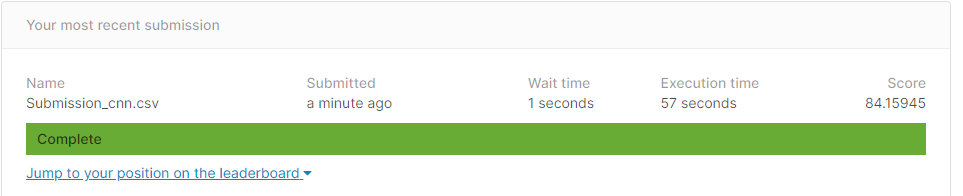

In [ ]:
from IPython.display import display
from PIL import Image


path="Screenshot_15.png"
display(Image.open(path))
